In [114]:
#load necessary libraries
import sklearn as sk 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
import scipy.stats

In [115]:
#read in data set and take a look at it
water_df = pd.read_csv("water_potability.csv")
water_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [116]:
#data cleaning
water_df.isna().mean()

ph                 0.149878
Hardness           0.000000
Solids             0.000000
Chloramines        0.000000
Sulfate            0.238400
Conductivity       0.000000
Organic_carbon     0.000000
Trihalomethanes    0.049451
Turbidity          0.000000
Potability         0.000000
dtype: float64

In [117]:
#we're missing a good % of the sulfate data as well as a good % of the PH and a little less of the trihalomethanes data 
#we're going to check how dropping NAs affects the shape of the data set 
water_df = water_df.dropna()
water_df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441374,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346,0.490678
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915,0.000000
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000
75%,8.052969,216.441070,27182.587067,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175,1.000000
max,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


<Axes: xlabel='Potability', ylabel='count'>

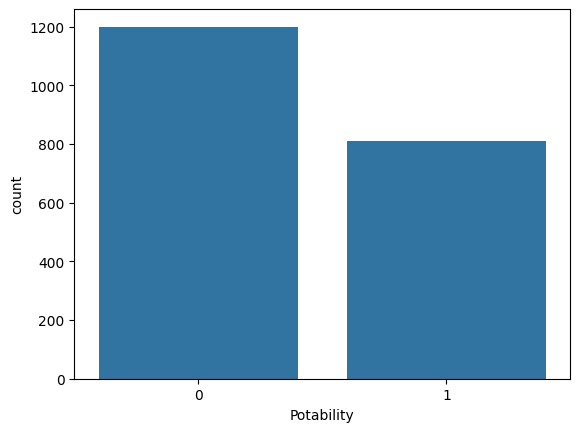

In [118]:
#a quick glance shows no significant changes between the data sets after dropping NA's and there's still a significant amount of data so we
#will proceed with the slightly trimmed down data
#let's look at how balanced this data set it
sns.countplot(x='Potability', data = water_df)

In [119]:
#ok so not exactly balanced, a glance at the mean shows that it's 40% potable, and 60% non-potable, which is good enough for me

In [120]:
#pre-processing, divide features from labels
X = water_df.drop(['Potability'],axis = 1)
y = water_df['Potability']

In [121]:
X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425


In [122]:
y.head()

3    0
4    0
5    0
6    0
7    0
Name: Potability, dtype: int64

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state=0)

In [125]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [127]:
rf_class = RandomForestClassifier(n_estimators=100, random_state=9)
rf_class.fit(X_train,y_train)

RandomForestClassifier(random_state=9)

In [128]:
predicted = rf_class.predict(X_test)
accuracy = accuracy_score(y_test,predicted)
accuracy

0.7270471464019851

In [129]:
#that's solid but i want a little better, let's go for a decision tree
from sklearn import tree

In [130]:
clf = tree.DecisionTreeClassifier()

In [131]:
clf = clf.fit(X_train,y_train)

In [132]:
predicted_tree = clf.predict(X_test)

In [142]:
clf.score(X_test,y_test)

0.6104218362282878

Trihalomethanes: 0.0555776237979131
Organic_carbon: 0.09202516047195738
Turbidity: 0.09313474816725006
Conductivity: 0.09437787191819862
Solids: 0.09946593113860874
Chloramines: 0.1268050821415956
ph: 0.13221233126888068
Hardness: 0.13976605287466826
Sulfate: 0.16663519822092757


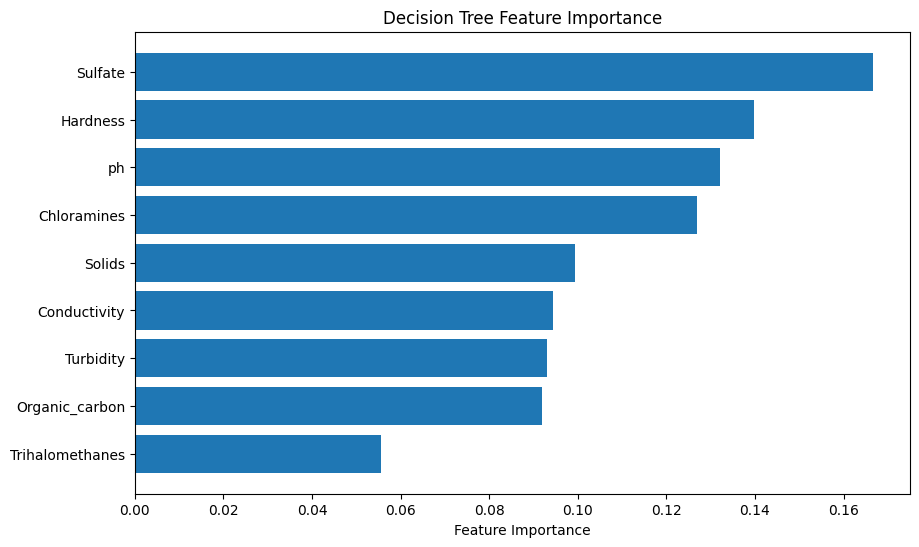

In [144]:
feature_importance = clf.feature_importances_
feature_names = X.columns
sorted_idx = feature_importance.argsort()

for i in sorted_idx:
    print(f"{feature_names[i]}: {feature_importance[i]}")

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importance')
plt.show()

In [134]:
#well that's not good   
#on to the next 

In [135]:
from sklearn.neighbors import KNeighborsClassifier

In [136]:
knn_class = KNeighborsClassifier(n_neighbors=1)

In [137]:
knn_class.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [138]:
y_pred = knn_class.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.6054590570719603

In [139]:
#well that's unfortunate, they all suck
#but random forest is the least terrible so we'll roll with it

In [140]:
feature_importance = rf_class.feature_importances_
feature_names = X.columns
sorted_idx = feature_importance.argsort()

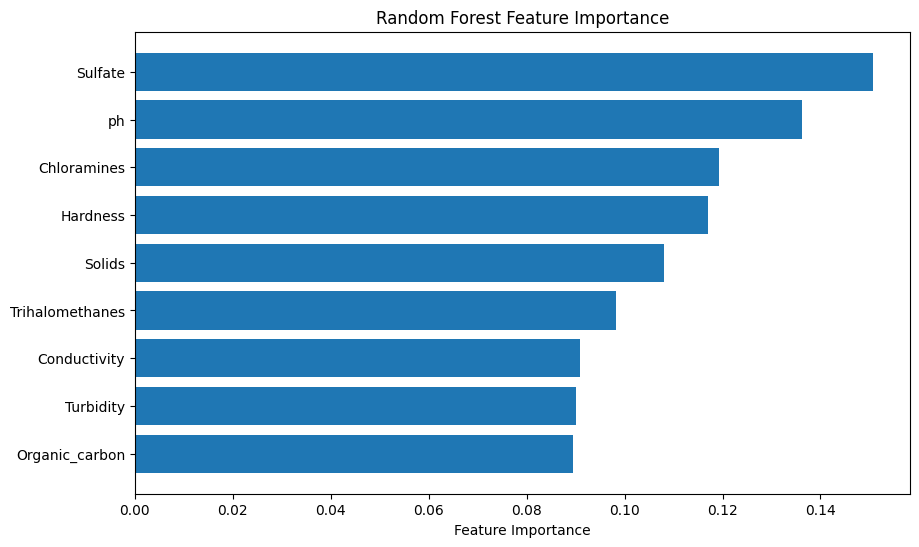

In [141]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()